<a href="https://colab.research.google.com/github/konradbachusz/tensorflow-getting-started/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"%tensorflow_version 1.x" 

'%tensorflow_version 1.x'

Instructions for updating:
non-resource variables are not supported in the long term


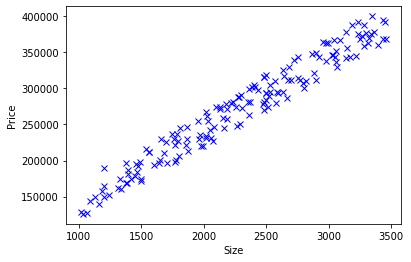

In [0]:
#
#   House_Price_Prediction.py
#
#    This is a very simple prediction of house prices based on house size, implemented 
#   in TensorFlow.  This code is part of Pluralsight's course "TensorFlow: Getting Started"
#

import tensorflow as tf
import numpy as np
import math
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation # import animation support
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
#  generation some house sizes between 1000 and 3500 (typical sq ft of house)
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house )

# Generate house prices from house size with a random noise added.
np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_house)  

# Plot generated house and size 
plt.plot(house_size, house_price, "bx")  # bx = blue x
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()



iteration #: 0002 cost= 1.435972571 size_factor= -0.5644572 price_offset= -0.6690232
iteration #: 0004 cost= 0.968542278 size_factor= -0.28408852 price_offset= -0.5475985
iteration #: 0006 cost= 0.655411601 size_factor= -0.054600086 price_offset= -0.44820008
iteration #: 0008 cost= 0.445653200 size_factor= 0.13324158 price_offset= -0.36683252
iteration #: 0010 cost= 0.305147111 size_factor= 0.28699446 price_offset= -0.30022496
iteration #: 0012 cost= 0.211034507 size_factor= 0.41284454 price_offset= -0.24569999
iteration #: 0014 cost= 0.148000419 size_factor= 0.515856 price_offset= -0.20106572
iteration #: 0016 cost= 0.105785333 size_factor= 0.60017306 price_offset= -0.16452807
iteration #: 0018 cost= 0.077515393 size_factor= 0.6691893 price_offset= -0.1346182
iteration #: 0020 cost= 0.058586527 size_factor= 0.7256801 price_offset= -0.11013399
iteration #: 0022 cost= 0.045913842 size_factor= 0.7719193 price_offset= -0.09009117
iteration #: 0024 cost= 0.037431080 size_factor= 0.8097671 

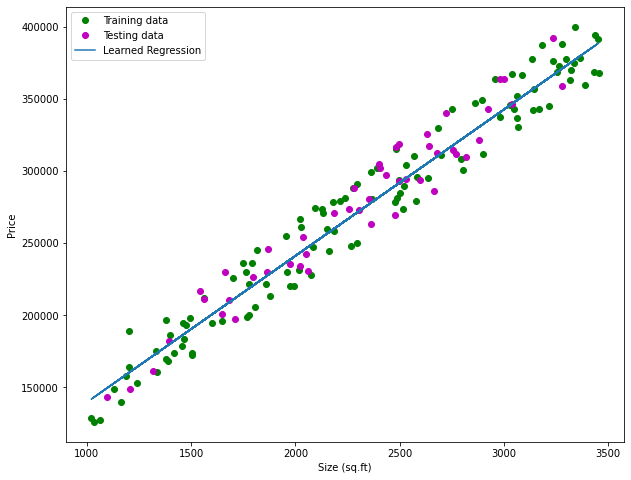

In [12]:

# you need to normalize values to prevent under/overflows.
def normalize(array):
    return (array - array.mean()) / array.std()

# define number of training samples, 0.7 = 70%.  We can take the first 70% since the values are randomized
num_train_samples = math.floor(num_house * 0.7)

# define training data
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asanyarray(house_price[:num_train_samples:])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

# define test data
test_house_size = np.array(house_size[num_train_samples:])
test_house_price = np.array(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

#  Set up the TensorFlow placeholders that get updated as we descend down the gradient
tf_house_size = tf.placeholder("float", name="house_size")
tf_price = tf.placeholder("float", name="price")

# Define the variables holding the size_factor and price we set during training.  
# We initialize them to some random values based on the normal distribution.
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")


# 2. Define the operations for the predicting values - predicted price = (size_factor * house_size ) + price_offset
#  Notice, the use of the tensorflow add and multiply functions.  These add the operations to the computation graph,
#  AND the tensorflow methods understand how to deal with Tensors.  Therefore do not try to use numpy or other library 
#  methods.
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)


# 3. Define the Loss Function (how much error) - Mean squared error
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred-tf_price, 2))/(2*num_train_samples)


# Optimizer learning rate.  The size of the steps down the gradient
learning_rate = 0.1

# 4. define a Gradient descent optimizer that will minimize the loss defined in the operation "cost".
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph in the session
with tf.Session() as sess:
    sess.run(init)

    # set how often to display training progress and number of training iterations
    display_every = 2
    num_training_iter = 50

    # calculate the number of lines to animation
    fit_num_plots = math.floor(num_training_iter/display_every)
    # add storage of factor and offset values from each epoch
    fit_size_factor = np.zeros(fit_num_plots)
    fit_price_offsets = np.zeros(fit_num_plots)
    fit_plot_idx = 0    

   # keep iterating the training data
    for iteration in range(num_training_iter):

        # Fit all training data
        for (x, y) in zip(train_house_size_norm, train_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_price: y})

        # Display current status
        if (iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price:train_price_norm})
            print("iteration #:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(c), \
                "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
            # Save the fit size_factor and price_offset to allow animation of learning process
            fit_size_factor[fit_plot_idx] = sess.run(tf_size_factor)
            fit_price_offsets[fit_plot_idx] = sess.run(tf_price_offset)
            fit_plot_idx = fit_plot_idx + 1

    print("Optimization Finished!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), '\n')


   # Plot of training and test data, and learned regression
    
    # get values used to normalized data so we can denormalize data back to its original scale
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()

    train_price_mean = train_price.mean()
    train_price_std = train_price.std()

    # Plot the graph
    plt.rcParams["figure.figsize"] = (10,8)
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label='Training data')
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
             (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,
             label='Learned Regression')
 
    plt.legend(loc='upper left')
    plt.show()


